# **Importing Required Libraries**

> **numpy (NumPy):** Sayısal işlemler için.

> **matplotlib.pyplot:** Grafik ve görselleştirme için.

> **keras.layers:** Katmanlar (layers) oluşturmak için.

> **keras.models:** Model oluşturmak için.

> **tensorflow.keras.utils:** Yardımcı fonksiyonlar için, burada to_categorical fonksiyonu kullanılıyor.

> **keras.datasets:** MNIST veri setini yüklemek için.

In [1]:
#Gerekli Kütüphanelerin İçe Aktarılması
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

2024-05-28 20:20:48.981091: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-28 20:20:48.981234: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-28 20:20:49.134967: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Loading the MNIST Dataset**

> **MNIST veri seti**, keras.datasets.mnist modülünden yükleniyor. Bu veri seti el yazısı rakamların görüntülerini içerir.

> **X_train:** Eğitim veri setindeki görüntüler.
> 
> **y_train:** Eğitim veri setindeki etiketler (rakamlar).
> 
> **X_test:** Test veri setindeki görüntüler.
> 
> **y_test**: Test veri setindeki etiketler.

> **X_train.shape:** Eğitim veri setindeki görüntülerin boyutları. (60000, 28, 28) - 60.000 adet 28x28 piksel görüntü.
> 
> **X_test.shape:** Test veri setindeki görüntülerin boyutları. (10000, 28, 28) - 10.000 adet 28x28 piksel görüntü.


In [2]:
#MNIST Veri Setinin Yüklenmesi
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#Veri setinin boyutları yazdırılıyor
print(X_train.shape)
print(X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


# **Converting Tags to One-Hot Encoding Format**

> Etiketler one-hot encoding formatına dönüştürülüyor. **One-hot encoding**, her sınıfı (rakamı) bir **vektör** olarak temsil eder. Örneğin, 3 rakamı [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] şeklinde temsil edilir.

> **to_categorical:** Kategori etiketlerini one-hot formatına dönüştüren fonksiyon. Bu dönüşüm, modelin çıktısını *karşılaştırmak* için gereklidir.

In [3]:
#Etiketlerin One-Hot Encoding Formatına Dönüştürülmesi
temp = []

for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

# **Creating the Model**

> Bu kısımda bir sinir ağı modeli oluşturuluyor:

> **Sequential:** Modeli katman katman oluşturmak için kullanılan model türü.
> 
> **Flatten:** 28x28 piksel görüntüyü 784 boyutlu bir vektöre dönüştürür.
> 
> **Dense:** Yoğun (fully connected) katmanlar eklenir.
> 
> **İlk Dense katman:** 16 nöron ve sigmoid aktivasyon fonksiyonu kullanır.
> 
> **İkinci Dense katman:** 10 nöron ve softmax aktivasyon fonksiyonu kullanır. Bu, 10 sınıf (rakam) için olasılık dağılımı verir.
> 
> **model.summary():** Modelin özetini yazdırır.

In [4]:
#Modelin Oluşturulması
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)

# **Compiling the Model**

> **loss='categorical_crossentropy':** Çok sınıflı sınıflandırma problemleri için kayıp fonksiyonu.
> 
> **optimizer='adam':** Adam optimizasyon algoritması.
> 
> **metrics=['acc']:** Eğitim sırasında takip edilecek metrik, burada doğruluk (accuracy).

In [5]:
#Modelin Derlenmesi
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

# **Training the Model**

> **X_train, y_train:** Eğitim veri seti ve etiketleri.
> 
> **epochs=15:** Eğitim 15 dönem boyunca yapılacak.
> 
> **validation_data=(X_test, y_test):** Doğrulama veri seti ve etiketleri.

In [6]:
#Modelin Eğitilmesi
model.fit(X_train, y_train, epochs=15, 
          validation_data=(X_test,y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.5653 - loss: 1.4694 - val_acc: 0.8124 - val_loss: 0.6585
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8220 - loss: 0.6230 - val_acc: 0.8366 - val_loss: 0.5367
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8343 - loss: 0.5396 - val_acc: 0.8536 - val_loss: 0.4898
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8485 - loss: 0.5010 - val_acc: 0.8572 - val_loss: 0.4668
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8511 - loss: 0.4810 - val_acc: 0.8618 - val_loss: 0.4626
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8620 - loss: 0.4527 - val_acc: 0.8788 - val_loss: 0.4136
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8608 - loss: 0.4549 - val_acc: 0.8669 - val_loss: 0.4376
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8685 - loss: 0.4333 - val_acc: 0.8750 - val_loss: 0.4200
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━

# **Making Predictions and Visualization**

> **model.predict(X_test):** Test veri setindeki her bir görüntü için olasılık tahminleri yapar.
> 
> **np.argmax(predictions, axis=1):** En yüksek olasılığa sahip sınıf (rakam) etiketi bulunur.

In [7]:
#Tahminlerin Yapılması ve Görselleştirme
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


# **Visualization of Predictions**

> **plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4)):** 10 kolonlu bir grafik oluşturur.
> 
> **axes[i].set_title(predictions[i]):** Her bir alt grafik için tahmin edilen etiketi başlık olarak ayarlar.
> 
> **axes[i].imshow(X_test[i], cmap='gray'):** Görüntüyü gri tonlamalı olarak gösterir.
> 
> **axes[i].get_xaxis().set_visible(False), axes[i].get_yaxis().set_visible(False):** X ve Y eksenlerini gizler.

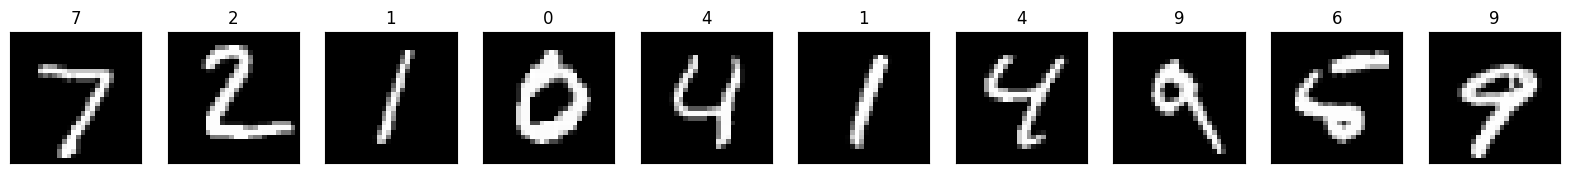

In [8]:
#Tahminlerin Görselleştirilmesi
fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()